Male
United States of America
Décennie avec le plus haut ratio de lauréats nés aux USA : 2000
    decade  Us_born_winners
10  2000.0         0.422764
9   1990.0         0.403846
12  2020.0         0.360000
8   1980.0         0.319588
7   1970.0         0.317308
11  2010.0         0.314050
4   1940.0         0.302326
5   1950.0         0.291667
6   1960.0         0.265823
3   1930.0         0.250000
1   1910.0         0.075000
2   1920.0         0.074074
0   1900.0         0.017544


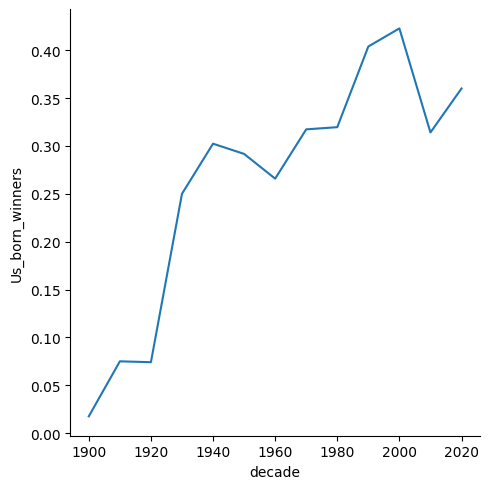

In [1]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np

# Start coding here!
# import the data
nobel_prize = pd.read_csv("data/nobel.csv")

#Checking all the info and columns
""""print(nobel_prize.head())
print(nobel_prize.describe())
print(nobel_prize.info())"""

# Get the the most commonly awarded gender and birth country
top_gender =  nobel_prize["sex"].value_counts().index[0]
top_country = nobel_prize["birth_country"].value_counts().index[0]

print(top_gender)
print(top_country)

# Get the highest ratio of US-born Nobel Prize winners to total winners in all categories

nobel_prize["Us_born_winners"] = nobel_prize["birth_country"] == "United States of America"
nobel_prize["decade"] = np.floor((nobel_prize["year"] / 10).astype(int) * 10)

# Calculer le ratio de lauréats nés aux USA par décennie
usa_ratio_by_decade = nobel_prize.groupby("decade", as_index=False)["Us_born_winners"].mean()

# Trouver la décennie avec le ratio le plus élevé
max_decade_usa = usa_ratio_by_decade[usa_ratio_by_decade["Us_born_winners"] == usa_ratio_by_decade["Us_born_winners"].max()]["decade"].values[0].astype(int)

print(f"Décennie avec le plus haut ratio de lauréats nés aux USA : {max_decade_usa}")
print(usa_ratio_by_decade.sort_values(by="Us_born_winners", ascending=False))

sns.relplot(data=usa_ratio_by_decade , x="decade" , y="Us_born_winners" , kind="line")




{'decade': 2020, 'category': 'Literature'}


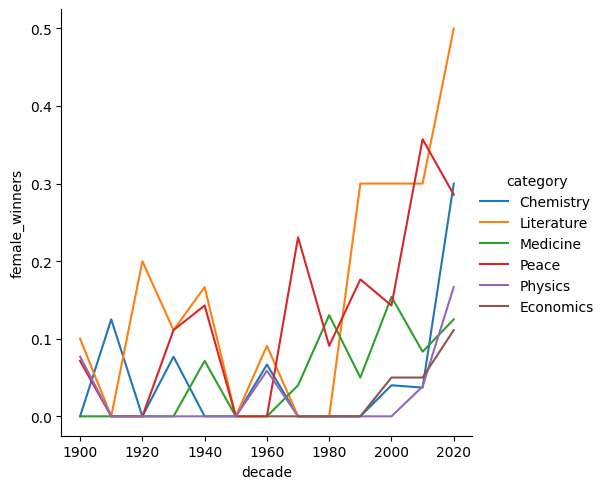

In [2]:
nobel_prize["female_winners"] = nobel_prize["sex"] == "Female"
grouped = nobel_prize.groupby(['decade', 'category'], as_index=False)["female_winners"].mean()

# Sort descending by ratio of female winners
grouped_sorted = grouped.sort_values(by="female_winners", ascending=False)

# Take the top row
top_row = grouped_sorted.iloc[0]

max_female_dict = {
    "decade": int(top_row["decade"]),
    "category": top_row["category"]
}

print(max_female_dict)
sns.relplot(data=grouped, x="decade", y="female_winners", hue="category", kind="line")


In [3]:
# Find the first woman to win a Nobel Prize

first_woman = nobel_prize[nobel_prize["female_winners"]]
value_min = first_woman["year"].min()
first_woman_row = first_woman[first_woman["year"] == value_min]
print(first_woman_row[["full_name" ,"year", "category" ]])

                      full_name  year category
19  Marie Curie, née Sklodowska  1903  Physics


In [4]:
winners_count = nobel_prize["full_name"].value_counts()
count_two = winners_count[winners_count >= 2].index
repeats = list(count_two)
print(repeats)

['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)', 'John Bardeen', 'Linus Carl Pauling']
